## parameters

In [16]:
MULPIPIER = int(1e6)
text_l = 120

## includes

In [27]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import io


In [18]:
%load_ext autoreload
%autoreload 2
packages = !conda list
packages

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


['# packages in environment at /opt/conda:',
 '#',
 '# Name                    Version                   Build  Channel',
 '_libgcc_mutex             0.1                 conda_forge    conda-forge',
 '_openmp_mutex             4.5                       0_gnu    conda-forge',
 'alembic                   1.4.2              pyh9f0ad1d_0    conda-forge',
 'argon2-cffi               20.1.0                   pypi_0    pypi',
 'astroid                   2.4.2                    pypi_0    pypi',
 'astunparse                1.6.3                    pypi_0    pypi',
 'async_generator           1.10                       py_0    conda-forge',
 'attrs                     19.3.0                     py_0    conda-forge',
 'backcall                  0.1.0                      py_0    conda-forge',
 'beautifulsoup4            4.9.1                    pypi_0    pypi',
 'bleach                    3.1.5              pyh9f0ad1d_0    conda-forge',
 'blinker                   1.4                        py_1

## Output registry

In [80]:
!pwd

/docker/sentimentanalysis/src


In [5]:
from __future__ import print_function
import sys, os

old__file__ = !pwd
__file__ = !cd ../../photon ;pwd
#__file__ = !pwd
__file__ = __file__[0]
__file__
sys.path.append(__file__)
print(sys.path)
os.chdir(old__file__[0])
!pwd
old__file__[0]

['/docker/sentimentanalysis/src', '/opt/conda/lib/python37.zip', '/opt/conda/lib/python3.7', '/opt/conda/lib/python3.7/lib-dynload', '', '/opt/conda/lib/python3.7/site-packages', '/opt/conda/lib/python3.7/site-packages/IPython/extensions', '/home/jovyan/.ipython', '/docker/photon']
/docker/sentimentanalysis/src


'/docker/sentimentanalysis/src'

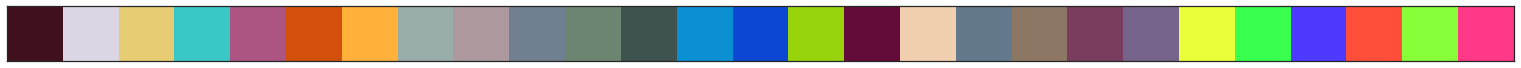

In [20]:
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
####### nlp libraries
import spacy as spacy
import re
from textacy.preprocessing.remove import remove_punctuation
from textacy.preprocessing.replace import replace_phone_numbers
from textacy.preprocessing.replace import replace_urls
from textacy.preprocessing.replace import replace_emails
from textacy.preprocessing.replace import replace_phone_numbers
from textacy.preprocessing.normalize import normalize_whitespace
from textacy.preprocessing.normalize import normalize_hyphenated_words
import nltk
from bs4 import BeautifulSoup
from spacymoji import Emoji
import urllib.request
import urllib3 as urlib




import itertools
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#set font size of labels on matplotlib plots
plt.rc('font', size=16)

#set style of plots
sns.set_style('white')

#define a custom palette
PALLET = ['#40111D', '#DCD5E4', '#E7CC74'
                 ,'#39C8C6', '#AC5583', '#D3500C'
                 ,'#FFB139', '#98ADA7', '#AD989E'
                 ,'#708090','#6C8570','#3E534D'

                 ,'#0B8FD3','#0B47D3','#96D30B'                 
                 ,'#630C3A','#F1D0AF','#64788B'                 
                 ,'#8B7764','#7A3C5D','#77648B'
                 ,'#eaff39','#39ff4e','#4e39ff'
                 ,'#ff4e39','#87ff39','#ff3987', ]
N_PALLET = len(PALLET)
sns.set_palette(PALLET)
sns.palplot(PALLET)


# Test pre-process

## Standardization

1. **Change from bytes (UTF-8) to string**
1. **Change all characters to lower case;**
1. **remove extra whitespaces;**
1. **Replace currency symbol;**
1. **Remove all the punctuation**
1. **Remove markup and metadata in HTML**
1. **Replace email symbols**
1. **Replace currency symbol**
1. **Remove puncuation**


1. Replace zip codes
1. Replace phone numbers
1. Remove or substitute unicode characters;
1. remove text file headers, footers;
1. **put emoji in pipeline**
1. **convert emoji into words (or phases);**
1.  Correct mis-spelling


We can further optimize our code by changing the for loop into list comprehension:



### set up long_s

In [21]:
MULPIPIER = int(9e3)
%time long_s = ':( 😻 👍🏿 https://medium.com/ <title>Document Title</title> :( cat- \n pig immed- \n iatedly <html><h2>2nd levelheading</h2></html>  . , # bhc@gmail.com  f@z.y a$@  can\'t bc$$ ef$4 5 66 $ wont seven eihtg $ nine $$zer$ ' * MULPIPIER
print('size: {:g} {}'.format(len(long_s),long_s[:250]))  

CPU times: user 2.6 ms, sys: 2.01 ms, total: 4.62 ms
Wall time: 4.79 ms
size: 1.935e+06 :( 😻 👍🏿 https://medium.com/ <title>Document Title</title> :( cat- 
 pig immed- 
 iatedly <html><h2>2nd levelheading</h2></html>  . , # bhc@gmail.com  f@z.y a$@  can't bc$$ ef$4 5 66 $ wont seven eihtg $ nine $$zer$ :( 😻 👍🏿 https://medium.com/ <title>


### Removing HTML metadata

In [8]:
%time long_s = BeautifulSoup(long_s,'html.parser').get_text()
print('size: {:g} {}'.format(len(long_s),long_s[:250]))

CPU times: user 1.78 s, sys: 50.1 ms, total: 1.83 s
Wall time: 1.83 s
size: 1.602e+06 :( 😻 👍🏿 https://medium.com/ Document Title :( cat- 
 pig immed- 
 iatedly 2nd levelheading  . , # bhc@gmail.com  f@z.y a$@  can't bc$$ ef$4 5 66 $ wont seven eihtg $ nine $$zer$ :( 😻 👍🏿 https://medium.com/ Document Title :( cat- 
 pig immed- 
 iatedl


### running  spacy default pipieline

In [9]:
%time nlp = spacy.load("en_core_web_lg")
nlp.max_length = len(long_s) + 10

%time long_s_doc = nlp(long_s)
print('size: {:g} {}'.format(len(long_s_doc),long_s_doc[:50]))

CPU times: user 5.88 s, sys: 682 ms, total: 6.56 s
Wall time: 6.62 s
CPU times: user 59.6 s, sys: 15.3 s, total: 1min 14s
Wall time: 1min 14s
size: 369000 :( 😻 👍🏿 https://medium.com/ Document Title :( cat- 
 pig immed- 
 iatedly 2nd levelheading  . , # bhc@gmail.com  f@z.y a$@  can't bc$$ ef$4 5 66 $ wont seven eihtg $ nine $$zer$ :( 😻 👍🏿 https://medium.com/ Document Title :( cat-


In [10]:
nlp.pipe_names

['tagger', 'parser', 'ner']

In [11]:
dir(long_s_doc[0])

['_',
 '__bytes__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 'ancestors',
 'check_flag',
 'children',
 'cluster',
 'conjuncts',
 'dep',
 'dep_',
 'doc',
 'ent_id',
 'ent_id_',
 'ent_iob',
 'ent_iob_',
 'ent_kb_id',
 'ent_kb_id_',
 'ent_type',
 'ent_type_',
 'get_extension',
 'has_extension',
 'has_vector',
 'head',
 'i',
 'idx',
 'is_alpha',
 'is_ancestor',
 'is_ascii',
 'is_bracket',
 'is_currency',
 'is_digit',
 'is_left_punct',
 'is_lower',
 'is_oov',
 'is_punct',
 'is_quote',
 'is_right_punct',
 'is_sent_end',
 'is_sent_start',
 'is_space',
 'is_stop',
 'is_title',
 'is_upper',
 'lang',
 'lang_',
 'left_edge',
 'lefts',
 'lemma',
 'lemma_',
 'lex_id',
 'l

### Adding emoji component

In [12]:
do = nlp.disable_pipes(["tagger", "parser"])

%time emoji = Emoji(nlp)
nlp.max_length = len(long_s) + 10
%time nlp.add_pipe(emoji, first=True)
%time long_s_doc = nlp(long_s)
print('size: {:g} {}'.format(len(long_s_doc),long_s_doc[:50]))

CPU times: user 319 ms, sys: 13.3 ms, total: 332 ms
Wall time: 331 ms
CPU times: user 22 µs, sys: 0 ns, total: 22 µs
Wall time: 26.2 µs
CPU times: user 24 s, sys: 5.23 s, total: 29.3 s
Wall time: 29.3 s
size: 360000 :( 😻 👍🏿 https://medium.com/ Document Title :( cat- 
 pig immed- 
 iatedly 2nd levelheading  . , # bhc@gmail.com  f@z.y a$@  can't bc$$ ef$4 5 66 $ wont seven eihtg $ nine $$zer$ :( 😻 👍🏿 https://medium.com/ Document Title :( cat- 
 pig


In [13]:
for i in range(20): print(long_s_doc[i]._.is_emoji)

False
True
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [14]:
nlp.pipe_names


['emoji', 'ner']

In [15]:
dir(long_s_doc[0]._)

['emoji_desc',
 'get',
 'has',
 'is_emoji',
 'set',
 'trf_alignment',
 'trf_all_attentions',
 'trf_all_hidden_states',
 'trf_d_all_attentions',
 'trf_d_all_hidden_states',
 'trf_d_last_hidden_state',
 'trf_d_pooler_output',
 'trf_end',
 'trf_last_hidden_state',
 'trf_pooler_output',
 'trf_separator',
 'trf_start',
 'trf_word_pieces',
 'trf_word_pieces_']

### gutenberg_text

In [22]:

text_url = r'http://www.gutenberg.org/files/74/74-0.txt' 
gutenberg_text =  urllib.request.urlopen(text_url).read()
gutenberg_text = gutenberg_text[0:340000] * 3
print('size: {:g} {}'.format(len(gutenberg_text),gutenberg_text[:text_l]))

size: 1.02e+06 b'\xef\xbb\xbf\r\nThe Project Gutenberg EBook of The Adventures of Tom Sawyer, Complete by\r\nMark Twain (Samuel Clemens)\r\n\r\nThis eBook'


### from bytes (UTF-8) to string

In [23]:
## Data variable encoding changed from bytes to string
%time gutenberg_text = gutenberg_text.decode('utf-8', "replace")
print('size: {:g} {}'.format(len(gutenberg_text),gutenberg_text[:text_l]))

CPU times: user 1.67 ms, sys: 0 ns, total: 1.67 ms
Wall time: 1.68 ms
size: 1.00427e+06 ﻿
The Project Gutenberg EBook of The Adventures of Tom Sawyer, Complete by
Mark Twain (Samuel Clemens)

This eBook i


### pdf to text

 PDF document using PyPDF2 package in Python and then convert the entire text into a Spacy document object. 

In [93]:
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage
from io import StringIO, BytesIO

def convert_pdf_to_txt(pathfilename,url=False):

    if not url:
        fp = open(pathfilename, mode="rb")# file(path, 'rb')
    else:
        url_text = urllib.request.urlopen(pathfilename).read()
        fp = io.BytesIO(url_text)

    rsrcmgr = PDFResourceManager()
    retstr = StringIO()
    laparams = LAParams()
    device = TextConverter(rsrcmgr, retstr, laparams=laparams)
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    password = ""
    maxpages = 0
    caching = True
    pagenos=set()

    for page in PDFPage.get_pages(fp, pagenos, maxpages=maxpages
                                  , password=password,caching=caching
                                  , check_extractable=True):
        interpreter.process_page(page)

    text = retstr.getvalue()

    fp.close()
    device.close()
    retstr.close()
    
    return text



In [96]:
text_url = "https://arxiv.org/pdf/2007.15801v1.pdf"
text_url = "https://arxiv.org/pdf/2008.04175v1.pdf"
text_url = "https://arxiv.org/pdf/2008.03364v1.pdf"


%time pdf_text = convert_pdf_to_txt(text_url,True).replace('\n', ' ')
print('size: {:g} {}'.format(len(pdf_text),pdf_text[:text_l*4]))

CPU times: user 38.5 s, sys: 175 ms, total: 38.7 s
Wall time: 44.7 s
size: 39383 0 2 0 2     g u A 7         ]  G L . s c [      1 v 4 6 3 3 0  .  8 0 0 2 : v i X r a  Improving the Speed and Quality of GAN by Adversarial  Training  Jiachen Zhong  Xuanqing Liu  Cho-Jui Hsieh  Department of Computer Science  University of California, Los Angeles  Los Angeles CA 90095  {julightzhong10,xqliu,chohsieh}@cs.ucla.edu  August 11, 2020  Abstract  Generative adversarial networks (GAN) have shown remarkable results in image generation tasks. High ﬁdelity class-condi


In [94]:
%time pdf_text = convert_pdf_to_txt('tmp/inf_finite_NN.pdf').replace('\n', ' ')
print('size: {:g} {}'.format(len(pdf_text),pdf_text[:text_l*4]))

CPU times: user 12.9 s, sys: 59.9 ms, total: 12.9 s
Wall time: 13 s
size: 89633 0 2 0 2    l u J    1 3      ]  G L . s c [      1 v 1 0 8 5 1  .  7 0 0 2 : v i X r a  Finite Versus Inﬁnite Neural Networks:  an Empirical Study  Jaehoon Lee  Samuel S. Schoenholz∗  Jeffrey Pennington∗  Ben Adlam†∗  Lechao Xiao∗  Roman Novak∗  Jascha Sohl-Dickstein  {jaehlee, schsam, jpennin, adlam, xlc, romann, jaschasd}@google.com  Google Brain  Abstract  We perform a careful, thorough, and large scale empirical study of the correspon- dence between wide neural networks a


### gutenberg_doc

In [18]:
if nlp.max_length < len(gutenberg_text) + 10:
    nlp.max_length = len(gutenberg_text) + 10
print('nlp.max_length: ', nlp.max_length)
%time gutenberg_doc = nlp(gutenberg_text)
print('size: {:g} {}'.format(len(gutenberg_doc),gutenberg_doc[:50]))

nlp.max_length:  1602010
CPU times: user 14.3 s, sys: 3.57 s, total: 17.9 s
Wall time: 17.9 s
size: 240790 ﻿
The Project Gutenberg EBook of The Adventures of Tom Sawyer, Complete by
Mark Twain (Samuel Clemens)

This eBook is for the use of anyone anywhere at no cost and with almost
no restrictions whatsoever. You may copy it, give it


### lowercase

In [19]:
### - **all characters to lower case;**
%time gutenberg_text = gutenberg_text.lower()
print('size: {:g} {}'.format(len(gutenberg_text),gutenberg_text[:text_l]))

CPU times: user 6.79 ms, sys: 195 µs, total: 6.99 ms
Wall time: 6.96 ms
size: 1.00427e+06 ﻿
the project gutenberg ebook of the adventures of tom sawyer, complete by
mark twain (samuel clemens)

this ebook i


### whitepace

In [20]:
%time text = re.sub(' +', ' ', long_s)
print('size: {:g} {}'.format(len(text),text[:text_l]))

CPU times: user 122 ms, sys: 3.27 ms, total: 125 ms
Wall time: 125 ms
size: 1.575e+06 :( 😻 👍🏿 https://medium.com/ Document Title :( cat- 
 pig immed- 
 iatedly 2nd levelheading . , # bhc@gmail.com f@z.y a$@


In [21]:
%time text= normalize_whitespace(long_s)
print('size: {:g} {}'.format(len(text),text[:text_l]))

CPU times: user 499 ms, sys: 5.13 ms, total: 504 ms
Wall time: 506 ms
size: 1.575e+06 :( 😻 👍🏿 https://medium.com/ Document Title :( cat- 
 pig immed- 
 iatedly 2nd levelheading . , # bhc@gmail.com f@z.y a$@


### puncuation

In [22]:
# none uses fast reqex
%time text = remove_punctuation(gutenberg_text, marks=None)
print('size: {:g} {}'.format(len(text),text[:50]))


CPU times: user 661 ms, sys: 1.33 ms, total: 662 ms
Wall time: 661 ms
size: 1.00427e+06 ﻿
the project gutenberg ebook of the adventures o


In [23]:
%time  text = remove_punctuation(gutenberg_text, marks='@#')
print('size: {:g} {}'.format(len(text),text[:50]))


CPU times: user 43.2 ms, sys: 46 µs, total: 43.3 ms
Wall time: 43.2 ms
size: 1.00427e+06 ﻿
the project gutenberg ebook of the adventures o


In [24]:
%time text = re.sub(r'[^\w\s]', ' ', gutenberg_text)
print('size: {:g} {}'.format(len(text),text[:50]))

CPU times: user 61.9 ms, sys: 213 µs, total: 62.1 ms
Wall time: 61.8 ms
size: 1.00427e+06  
the project gutenberg ebook of the adventures o


In [25]:
%time long_s_doc = [token  for token in long_s_doc if token.is_punct == False or token._.is_emoji == True]
print('size: {:g} {}'.format(len(long_s_doc),long_s_doc[:50]))

CPU times: user 754 ms, sys: 28.1 ms, total: 782 ms
Wall time: 781 ms
size: 315000 [😻, 👍🏿, https://medium.com/, Document, Title, cat-, 
 , pig, immed-, 
 , iatedly, 2nd, levelheading,  , bhc@gmail.com,  , f@z.y, a$@,  , ca, n't, bc$$, ef$4, 5, 66, $, wo, nt, seven, eihtg, $, nine, $, $, zer$, 😻, 👍🏿, https://medium.com/, Document, Title, cat-, 
 , pig, immed-, 
 , iatedly, 2nd, levelheading,  , bhc@gmail.com]


### Replace currency symbol

In [26]:
%time long_s = textacy.preprocessing.replace.replace_currency_symbols(long_s)
print('size: {:g} {}'.format(len(long_s),long_s[:250]))

NameError: name 'textacy' is not defined

size: 1.602e+06 :( 😻 👍🏿 https://medium.com/ Document Title :( cat- 
 pig immed- 
 iatedly 2nd levelheading  . , # bhc@gmail.com  f@z.y a$@  can't bc$$ ef$4 5 66 $ wont seven eihtg $ nine $$zer$ :( 😻 👍🏿 https://medium.com/ Document Title :( cat- 
 pig immed- 
 iatedl


In [27]:
%time text = re.sub('\$', '_DOL_', long_s)
print('size: {:g} {}'.format(len(text),text[:250]))

CPU times: user 18.6 ms, sys: 898 µs, total: 19.5 ms
Wall time: 19.5 ms
size: 1.926e+06 :( 😻 👍🏿 https://medium.com/ Document Title :( cat- 
 pig immed- 
 iatedly 2nd levelheading  . , # bhc@gmail.com  f@z.y a_DOL_@  can't bc_DOL__DOL_ ef_DOL_4 5 66 _DOL_ wont seven eihtg _DOL_ nine _DOL__DOL_zer_DOL_ :( 😻 👍🏿 https://medium.com/ Document


In [28]:
%time token = [token.text if token.is_currency == False else '_CUR_' for token in long_s_doc]
%time long_s = ' '.join(token)
print('size: {:g} {}'.format(len(long_s),long_s[:250]))

CPU times: user 285 ms, sys: 14.2 ms, total: 299 ms
Wall time: 298 ms
CPU times: user 8.77 ms, sys: 1.94 ms, total: 10.7 ms
Wall time: 10.6 ms
size: 1.719e+06 😻 👍🏿 https://medium.com/ Document Title cat- 
  pig immed- 
  iatedly 2nd levelheading   bhc@gmail.com   f@z.y a$@   ca n't bc$$ ef$4 5 66 _CUR_ wo nt seven eihtg _CUR_ nine _CUR_ _CUR_ zer$ 😻 👍🏿 https://medium.com/ Document Title cat- 
  pig immed- 


### Remove URL symbol

In [29]:
%time long_s = replace_urls(long_s,replace_with= '_URL_')
print('size: {:g} {}'.format(len(long_s),long_s[:250]))

CPU times: user 1.38 s, sys: 4.25 ms, total: 1.38 s
Wall time: 1.34 s
size: 1.593e+06 😻 👍🏿 _URL_ Document Title cat- 
  pig immed- 
  iatedly 2nd levelheading   bhc@gmail.com   f@z.y a$@   ca n't bc$$ ef$4 5 66 _CUR_ wo nt seven eihtg _CUR_ nine _CUR_ _CUR_ zer$ 😻 👍🏿 _URL_ Document Title cat- 
  pig immed- 
  iatedly 2nd levelheading 


###  Expanding Contractions

😻
👍🏿
https://medium.com/
Document
Title
cat-

 
pig
immed-

 
iatedly
2nd
levelheading
 
bhc@gmail.com
 
f@z.y
a$@
 
ca


In [31]:
print('size: {:g} {}'.format(len(text),text[:250]))

size: 1.926e+06 :( 😻 👍🏿 https://medium.com/ Document Title :( cat- 
 pig immed- 
 iatedly 2nd levelheading  . , # bhc@gmail.com  f@z.y a_DOL_@  can't bc_DOL__DOL_ ef_DOL_4 5 66 _DOL_ wont seven eihtg _DOL_ nine _DOL__DOL_zer_DOL_ :( 😻 👍🏿 https://medium.com/ Document


### Remove stopwords

In [36]:
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
%time stop = stopwords.words('english')
%time words = [word for word in gutenberg_text if word not in stop]
text = ''.join(words)
print('size: {:g} {}'.format(len(text),text[:text_l]))

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


CPU times: user 2.85 ms, sys: 0 ns, total: 2.85 ms
Wall time: 2.03 ms
CPU times: user 2.2 s, sys: 10.6 ms, total: 2.21 s
Wall time: 2.21 s
size: 646791 ﻿
he prjec guenberg ebk f he venure f  wer, cplee b
rk wn (uel cleen)

h ebk  fr he ue f nne nwhere  n c n wh l
n r


In [39]:
%time gutenberg_doc = [token for token in gutenberg_doc if token.is_stop == False]
print('size: {:g} {}'.format(len(gutenberg_doc),gutenberg_doc[:50]))

CPU times: user 301 ms, sys: 18.1 ms, total: 319 ms
Wall time: 318 ms
size: 132495 [﻿, 
, Project, Gutenberg, EBook, Adventures, Tom, Sawyer, ,, Complete, 
, Mark, Twain, (, Samuel, Clemens, ), 

, eBook, use, cost, 
, restrictions, whatsoever, ., copy, ,, away, -, use, 
, terms, Project, Gutenberg, License, included, 
, eBook, online, www.gutenberg.net, 

, Title, :, Adventures, Tom, Sawyer, ,, Complete, 

, Author]


## Normalization
- **normalize_hyphenated_words**
- Correct mis-spelling of words (tokens); [7]
- Perform **Lemmatization**

### normalize_hyphenated_words

In [33]:
%time long_s = normalize_hyphenated_words(long_s)
print('size: {:g} {}'.format(len(long_s),long_s[:250]))

CPU times: user 465 ms, sys: 1.89 ms, total: 467 ms
Wall time: 467 ms
size: 1.503e+06 😻 👍🏿 _URL_ Document Title catpig immediatedly 2nd levelheading   bhc@gmail.com   f@z.y a$@   ca n't bc$$ ef$4 5 66 _CUR_ wo nt seven eihtg _CUR_ nine _CUR_ _CUR_ zer$ 😻 👍🏿 _URL_ Document Title catpig immediatedly 2nd levelheading   bhc@gmail.com   f@


### Correct mis-spelling

In [34]:
!brew install enchant

/bin/sh: 1: brew: not found


In [35]:
ext = "this is sme text with a speling mistake."
from enchant.checker import SpellChecker
chkr = SpellChecker("en_US", text)
for err in chkr:
    err.replace(err.word)
chkr.get_text()

ModuleNotFoundError: No module named 'enchant'

### lemmatize

In [ ]:
from nltk.stem import WordNetLemmatizer
%time lemmas = [wordnet_lemmatizer.lemmatize(w) for w in tokens]
print('lemmas size: {:g} {}'.format(len(lemmas),lemmas[:20]))

## spacy does everthing

In [ ]:
### lowercase, Whitespace, punctuation

In [ ]:
for n, token in enumerate(gutenberg_doc[:10]):
    print('n: ',n, 'tk  attr:', token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
            token.shape_, token.is_alpha, token.is_stop)

In [ ]:
#### remove whitespace, lower, puncuation, tokenize
%time tokens = [token.text for token in gutenberg_doc if (token.pos_ not in ['SPACE','PUNCT'])]
%time text = ' '.join(tokens)
print('size: {:g} {}'.format(len(text),text[:50]))

### Replace currency symbol

In [ ]:
%time text = textacy.preprocessing.replace.replace_currency_symbols(long_s)
print('size: {:g} {}'.format(len(text),text[:250]))

### Replace email 

In [ ]:
%time text = textacy.preprocessing.replace.replace_emails(long_s)
print('size: {:g} {}'.format(len(text),text[:250]))

In [ ]:
%time tokens = [token for token in long_s_doc if not token.like_email]
print('size: {:g} {}'.format(len(tokens),tokens[:20]))

### Remove stopwords

In [ ]:
%time tokens = [vocab.text for vocab in gutenberg_doc if vocab.is_stop != True]
text = ' '.join(tokens)
print('size: {:g} {}'.format(len(text),text[:250]))


In [ ]:
dir(tokens[0])

In [ ]:
dir(gutenberg_doc.vocab[0])

In [ ]:
dir(tokens[0])

### Replace emojis with phase

In [ ]:
# Change emojicon to Recreate doc/corpus
%time tk = [token.text if token._.is_emoji == False else token._.emoji_desc for token in long_s_doc]
%time long_s = ' '.join(tk)
print('size: {:g} {}'.format(len(long_s),long_s[:250]))

## array test

In [ ]:

ALEN =1000000
#a = np.ndarray(ALEN, dtype=np.str)
a = []
for i in range(ALEN):
    a = a.append('word')
type(a)

## multiprocessing

## GPU
